# Домашнее задание по Matplotlib и Seaborn
# Ultra Pro
### *Часть 1. Matplotlib*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

### **Задача 1**

*1 балл*

Подгрузите любую картинку любым способом и выведите её на экран. Измените её размер на 480х320, добавьте зеленый прямоугольник в любом месте экрана и выведите результат.


In [ ]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


### **Решение:**

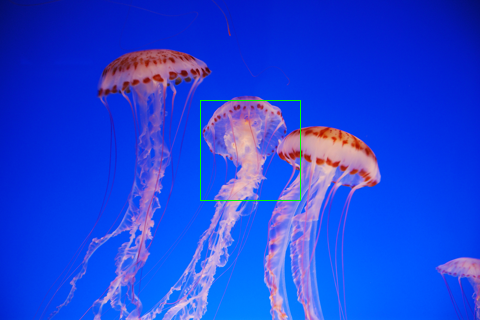

In [ ]:
from PIL import Image, ImageDraw # Модули работы с изображениями
img = Image.open('/content/drive/My Drive/БД/медуза.jpeg')
new_image = img.resize((480, 320))
draw = ImageDraw.Draw(new_image)
draw.rectangle((200, 100, 300, 200), fill=None, outline=(0, 255, 0))
new_image.show()

### **Задача 2**

*2 балла*

На основе данных, приведенных ниже, постройте парную гистограмму как на рисунке (100% сходство не обязательно).
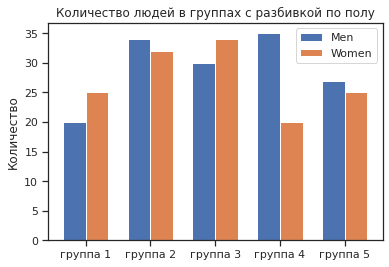


In [ ]:
labels = ['группа 1', 'группа 2', 'группа 3', 'группа 4', 'группа 5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

### **Решение:**

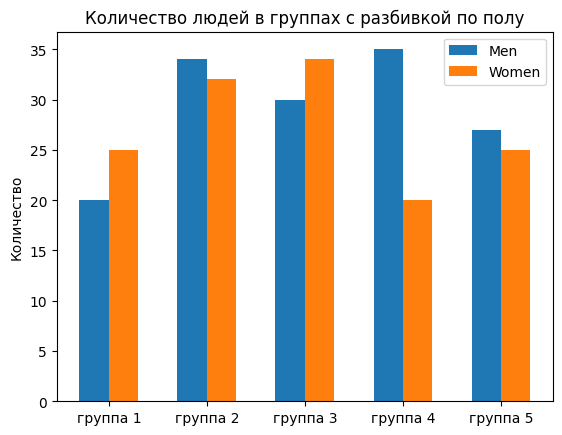

In [ ]:
width = 0.3
x = np.arange(len(labels))
fig, ax = plt.subplots()
men = ax.bar(x - width/2, men_means, width, label='Men')
women = ax.bar(x + width/2, women_means, width, label='Women')
ax.set_ylabel('Количество')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_title('Количество людей в группах с разбивкой по полу')
ax.legend()
plt.show()

### *Часть 2. Seaborn*

### **Задача 3**
*2 балла*

Используя датасет "Ирисы", подгруженный кодом ниже, постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец species).


In [ ]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### **Решение:**

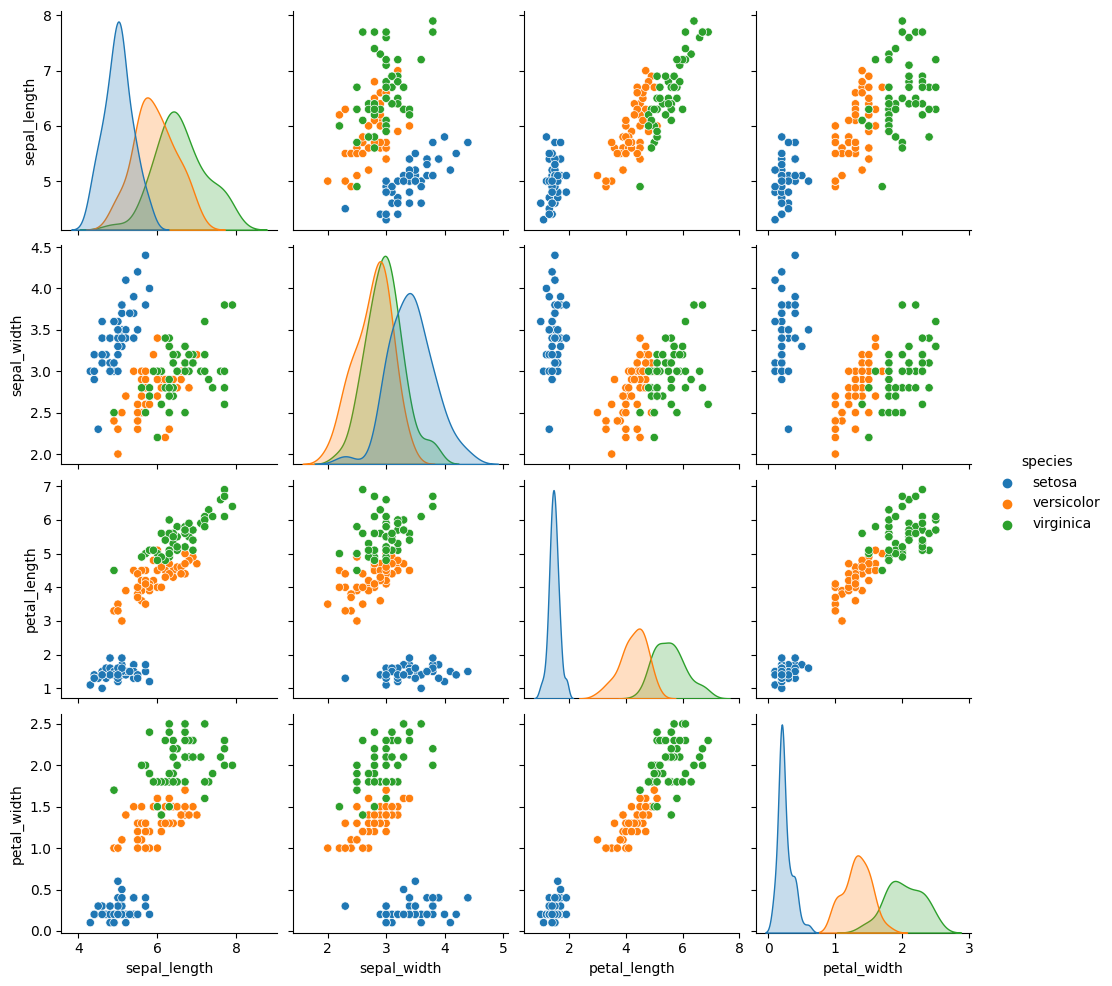

In [ ]:
sns.pairplot(iris, hue='species')
plt.show()

### **Задача 4**
*2 балла*

Используя датасет ниже "flights", посчитайте сумму ежегодных перелетов пассажиров (используя преобразование столбца "year" в столбец временных индексов) и постройте диаграмму, отображающую количество пассажиров за каждый год.

In [ ]:
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### **Решение:**

In [ ]:
df.index = pd.to_datetime(df.year, format='%Y')
df.drop(columns='year', inplace=True)
new_data = df.resample('Y').sum()
new_data

,passengers
year,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


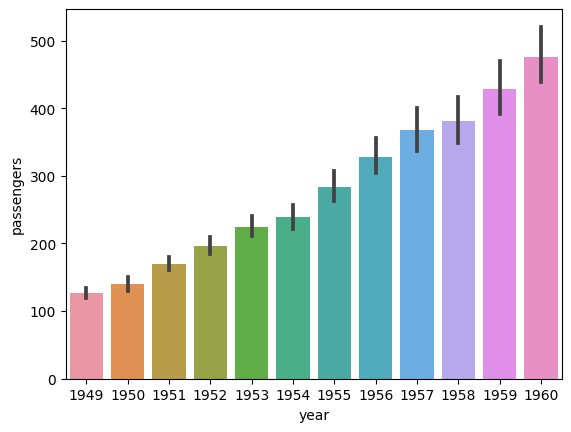

In [ ]:
sns.barplot(data = df, x = df.index.year, y = df.passengers)
plt.show()

### **Задача 5**
*3 балла*

Используя датасет "flights" из предыдущей задачи, постройте 12 boxplot'ов для каждого месяца на одном графике. Приведите в порядок размер и тики, чтобы график был читаемым.


<Axes: xlabel='month', ylabel='passengers'>

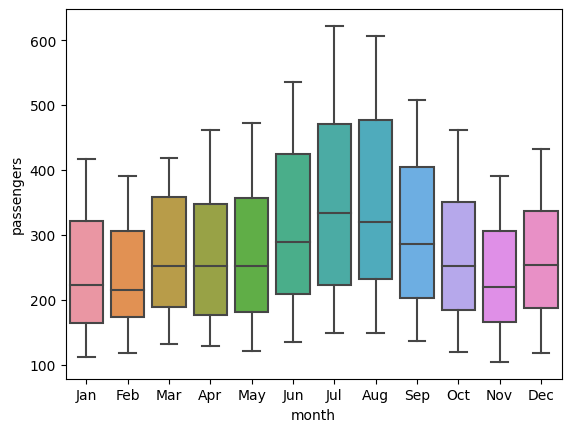

In [ ]:
df = sns.load_dataset("flights")
sns.boxplot(x = df.month, y = df.passengers)